In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [56]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=37)

In [57]:
X

array([[-6.05026508,  2.22985962],
       [ 2.07023829,  1.88940204],
       [ 9.58268908,  0.65451026],
       ...,
       [-4.42692546,  1.96501269],
       [-5.52661301,  2.96488583],
       [ 4.75012165,  3.11770713]], shape=(1000, 2))

In [58]:
y

array([1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2,
       1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0,
       0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0,

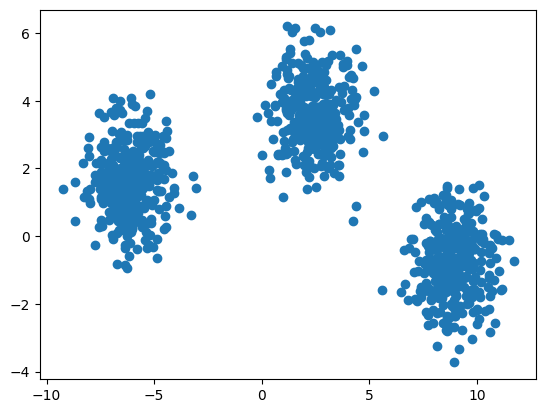

In [59]:
plt.scatter(X[:,0],X[:,1])

In [60]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [63]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [64]:
from sklearn.cluster import KMeans

In [65]:
## Elbow method To select K Value
wcss=[]              #within cluster sum of squares
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_) 

In [66]:
wcss

[1339.9999999999998,
 472.53857101216545,
 167.38242578591172,
 138.01503082214242,
 99.45235081799386,
 70.27302242260166,
 60.48735238148704,
 54.437938222382755,
 44.70687728381326,
 47.34248468533099]

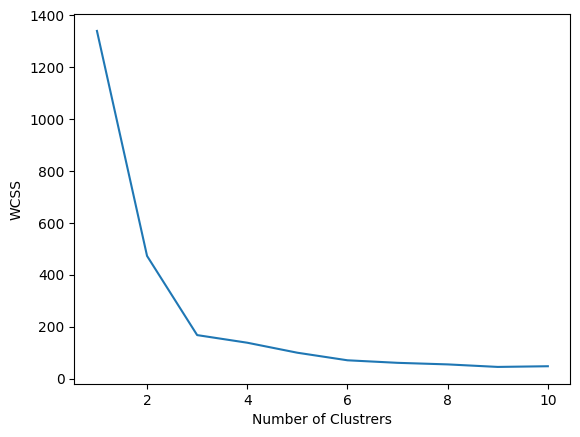

In [67]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [68]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [69]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1,
       0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2,
       0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0,
       0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1,
       2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1,
       1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2,

In [70]:
y_pred=kmeans.predict(X_test_scaled)

In [71]:
y_pred

array([0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2,
       0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0,
       2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0,
       2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1,
       0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1,
       2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2,

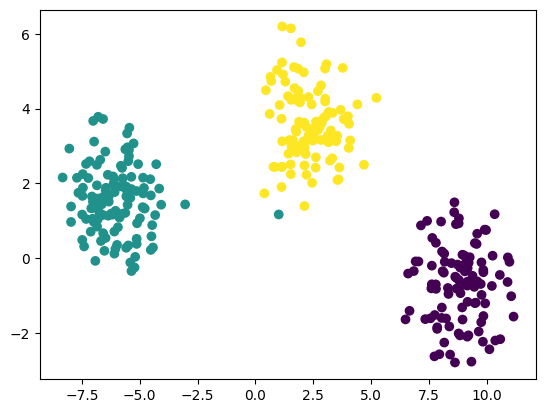

In [72]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
# Validating the k value - two more methods
# (i)  kneelocator
# (ii) Silhoutee scoring

In [74]:
## kneelocator
!pip install kneed

In [75]:
from kneed import KneeLocator

In [76]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [77]:
kl.elbow

np.int64(3)

In [78]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [79]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [80]:
silhouette_coefficients

[np.float64(0.6124825802721193),
 np.float64(0.6842206461293755),
 np.float64(0.6088610019040765),
 np.float64(0.5194102897503069),
 np.float64(0.47160544690866885),
 np.float64(0.4405975600262693),
 np.float64(0.4297848259941389),
 np.float64(0.4177412435776594),
 np.float64(0.4106718709517305)]

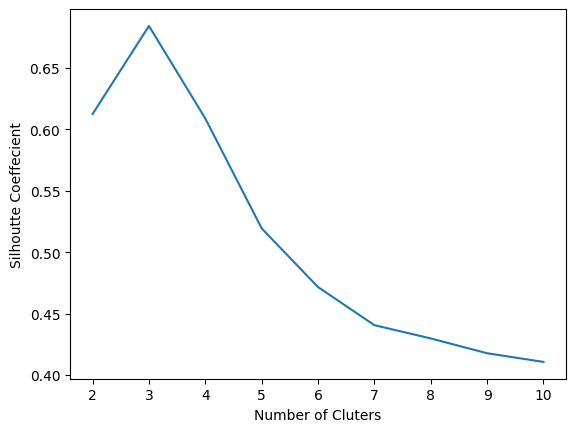

In [82]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()